In [2]:
%matplotlib inline
 
import matplotlib.pyplot as plt
import numpy as np
import os
import pprint
pp = pprint.PrettyPrinter(indent=4)



In [3]:
import joblib
from skimage.io import imread
from skimage.transform import resize
 
def resize_all(src, pklname, include, width=150, height=None):
    """
    load images from path, resize them and write them as arrays to a dictionary, 
    together with labels and metadata. The dictionary is written to a pickle file 
    named '{pklname}_{width}x{height}px.pkl'.
     
    Parameter
    ---------
    src: str
        path to data
    pklname: str
        path to output file
    width: int
        target width of the image in pixels
    include: set[str]
        set containing str
    """
     
    height = height if height is not None else width
     
    data = dict()
    data['description'] = 'resized ({0}x{1})animal images in rgb'.format(int(width), int(height))
    data['label'] = []
    data['filename'] = []
    data['data'] = []   
     
    pklname = f"{pklname}_{width}x{height}px.pkl"
 
    # read all images in PATH, resize and write to DESTINATION_PATH
    for subdir in os.listdir(src):
        if subdir in include:
            print(subdir)
            current_path = os.path.join(src, subdir)
 
            for file in os.listdir(current_path):
                if file[-3:] in {'jpg'}:
                    im = imread(os.path.join(current_path, file))
                    im = resize(im, (width, height)) #[:,:,::-1]
                    data['label'].append(subdir[:-4])
                    data['filename'].append(file)
                    data['data'].append(im)
 
        joblib.dump(data, pklname)

In [22]:

data_path = "C:/Users/ethan/ml/datasets/car_data/car_data/train"
os.listdir(data_path)

['Acura Integra Type R 2001',
 'Acura RL Sedan 2012',
 'Acura TL Sedan 2012',
 'Acura TL Type-S 2008',
 'Acura TSX Sedan 2012',
 'Acura ZDX Hatchback 2012',
 'AM General Hummer SUV 2000',
 'Aston Martin V8 Vantage Convertible 2012',
 'Aston Martin V8 Vantage Coupe 2012',
 'Aston Martin Virage Convertible 2012',
 'Aston Martin Virage Coupe 2012',
 'Audi 100 Sedan 1994',
 'Audi 100 Wagon 1994',
 'Audi A5 Coupe 2012',
 'Audi R8 Coupe 2012',
 'Audi RS 4 Convertible 2008',
 'Audi S4 Sedan 2007',
 'Audi S4 Sedan 2012',
 'Audi S5 Convertible 2012',
 'Audi S5 Coupe 2012',
 'Audi S6 Sedan 2011',
 'Audi TT Hatchback 2011',
 'Audi TT RS Coupe 2012',
 'Audi TTS Coupe 2012',
 'Audi V8 Sedan 1994',
 'Bentley Arnage Sedan 2009',
 'Bentley Continental Flying Spur Sedan 2007',
 'Bentley Continental GT Coupe 2007',
 'Bentley Continental GT Coupe 2012',
 'Bentley Continental Supersports Conv. Convertible 2012',
 'Bentley Mulsanne Sedan 2011',
 'BMW 1 Series Convertible 2012',
 'BMW 1 Series Coupe 2012',


In [25]:
base_name = 'train'
width = 80

include = {'Acura RL Sedan 2012','Audi A5 Coupe 2012', 'Audi S5 Convertible 2012',
           'BMW X5 SUV 2007', 'Chevrolet Cobalt SS 2010'}

resize_all(src=data_path, pklname=base_name, width=width, include=include)


Acura RL Sedan 2012
Audi A5 Coupe 2012
Audi S5 Convertible 2012
BMW X5 SUV 2007
Chevrolet Cobalt SS 2010


In [26]:
from collections import Counter
 
data = joblib.load(f'{base_name}_{width}x{width}px.pkl')
 
print('number of samples: ', len(data['data']))
print('keys: ', list(data.keys()))
print('description: ', data['description'])
print('labels:', np.unique(data['label']))
 
Counter(data['label'])

number of samples:  199
keys:  ['description', 'label', 'filename', 'data']
description:  resized (80x80)animal images in rgb
labels: ['Acura RL Sedan ' 'Audi A5 Coupe ' 'Audi S5 Convertible ' 'BMW X5 SUV '
 'Chevrolet Cobalt SS ']


Counter({'Acura RL Sedan ': 32,
         'Audi A5 Coupe ': 41,
         'Audi S5 Convertible ': 42,
         'BMW X5 SUV ': 42,
         'Chevrolet Cobalt SS ': 42})

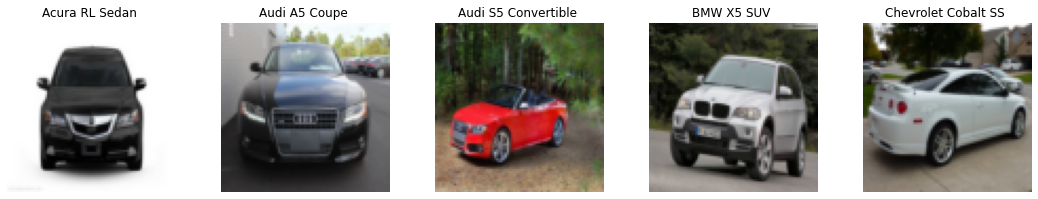

In [27]:

labels = np.unique(data['label'])
 

fig, axes = plt.subplots(1, len(labels))
fig.set_size_inches(15,4)
fig.tight_layout()
 
 

for ax, label in zip(axes, labels):
    idx = data['label'].index(label)
     
    ax.imshow(data['data'][idx])
    ax.axis('off')
    ax.set_title(label)

In [28]:
X = np.array(data['data'])
y = np.array(data['label'])

In [29]:
from sklearn.model_selection import train_test_split
 
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    shuffle=True,
    random_state=42,
)

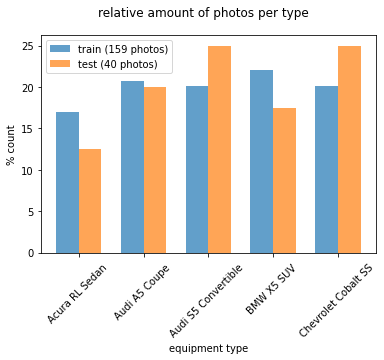

In [30]:
def plot_bar(y, loc='left', relative=True):
    width = 0.35
    if loc == 'left':
        n = -0.5
    elif loc == 'right':
        n = 0.5
     
    # calculate counts per type and sort, to ensure their order
    unique, counts = np.unique(y, return_counts=True)
    sorted_index = np.argsort(unique)
    unique = unique[sorted_index]
     
    if relative:
        # plot as a percentage
        counts = 100*counts[sorted_index]/len(y)
        ylabel_text = '% count'
    else:
        # plot counts
        counts = counts[sorted_index]
        ylabel_text = 'count'
         
    xtemp = np.arange(len(unique))
     
    plt.bar(xtemp + n*width, counts, align='center', alpha=.7, width=width)
    plt.xticks(xtemp, unique, rotation=45)
    plt.xlabel('equipment type')
    plt.ylabel(ylabel_text)
 
plt.suptitle('relative amount of photos per type')
plot_bar(y_train, loc='left')
plot_bar(y_test, loc='right')
plt.legend([
    'train ({0} photos)'.format(len(y_train)), 
    'test ({0} photos)'.format(len(y_test))
]);

In [31]:
#Processing Section

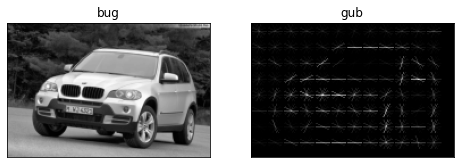

In [40]:
from skimage.feature import hog
from skimage.io import imread
from skimage.transform import rescale
 
bug = imread('C:/Users/ethan/ml/datasets/car_data/car_data/train/BMW X5 SUV 2007/00366.jpg',
             as_gray=True)

 

bug = rescale(bug, 1/3, mode='reflect')

bug_hog, bug_hog_img = hog(
    bug, pixels_per_cell=(14,14), 
    cells_per_block=(2, 2), 
    orientations=9, 
    visualize=True, 
    block_norm='L2-Hys')
 
fig, ax = plt.subplots(1,2)
fig.set_size_inches(8,6)

[a.tick_params(bottom=False, left=False, labelbottom=False, labelleft=False) 
    for a in ax]
 
ax[0].imshow(bug, cmap='gray')
ax[0].set_title('bug')
ax[1].imshow(bug_hog_img, cmap='gray')
ax[1].set_title('gub')
plt.show()

In [42]:
print('number of pixels: ', bug.shape[0] * bug.shape[1])
print('number of hog features: ', bug_hog.shape[0])

number of pixels:  21122
number of hog features:  2772


In [43]:
#Transformers Section

In [47]:
from sklearn.base import BaseEstimator, TransformerMixin
 
class RGB2GrayTransformer(BaseEstimator, TransformerMixin):
   
 
    def __init__(self):
        pass
 
    def fit(self, X, y=None):
        
        return self
 
    def transform(self, X, y=None):
        
        return np.array([skimage.color.rgb2gray(img) for img in X])
     
 
class HogTransformer(BaseEstimator, TransformerMixin):
   
 
    def __init__(self, y=None, orientations=9,
                 pixels_per_cell=(8, 8),
                 cells_per_block=(3, 3), block_norm='L2-Hys'):
        self.y = y
        self.orientations = orientations
        self.pixels_per_cell = pixels_per_cell
        self.cells_per_block = cells_per_block
        self.block_norm = block_norm
 
    def fit(self, X, y=None):
        return self
 
    def transform(self, X, y=None):
 
        def local_hog(X):
            return hog(X,
                       orientations=self.orientations,
                       pixels_per_cell=self.pixels_per_cell,
                       cells_per_block=self.cells_per_block,
                       block_norm=self.block_norm)
 
        try: 
            return np.array([local_hog(img) for img in X])
        except:
            return np.array([local_hog(img) for img in X])

In [48]:
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import StandardScaler, Normalizer
import skimage
 

grayify = RGB2GrayTransformer()
hogify = HogTransformer(
    pixels_per_cell=(14, 14), 
    cells_per_block=(2,2), 
    orientations=9, 
    block_norm='L2-Hys'
)
scalify = StandardScaler()
 

X_train_gray = grayify.fit_transform(X_train)
X_train_hog = hogify.fit_transform(X_train_gray)
X_train_prepared = scalify.fit_transform(X_train_hog)
 
print(X_train_prepared.shape)

(159, 576)


In [49]:
#Training Section

In [57]:
sgd_clf = SGDClassifier(random_state=42, max_iter=1000, tol=1e-3)
sgd_clf.fit(X_train_prepared, y_train)

SGDClassifier(random_state=42)

In [58]:


X_test_gray = grayify.transform(X_test)
X_test_hog = hogify.transform(X_test_gray)
X_test_prepared = scalify.transform(X_test_hog)

In [59]:
y_pred = sgd_clf.predict(X_test_prepared)
print(np.array(y_pred == y_test)[:25])
print('')
print('Percentage correct: ', 100*np.sum(y_pred == y_test)/len(y_test))

[False False False False  True False  True False  True False False False
  True False  True False False False False  True  True  True  True  True
 False]

Percentage correct:  42.5


In [60]:
#confusion Matrix Section

In [69]:
import pandas as pd

In [96]:
labels = y_test
predictions = y_pred
 
# put the data in a dataframe for pretty printing
df = pd.DataFrame(
    np.c_[labels, predictions], 
    columns=['true_label', 'prediction']
)
df

,true_label,prediction
0,Audi S5 Convertible,Audi A5 Coupe
1,Acura RL Sedan,Chevrolet Cobalt SS
2,Audi S5 Convertible,BMW X5 SUV
3,Chevrolet Cobalt SS,Audi S5 Convertible
4,Audi S5 Convertible,Audi S5 Convertible
5,Chevrolet Cobalt SS,Acura RL Sedan
6,Audi A5 Coupe,Audi A5 Coupe
7,Audi A5 Coupe,BMW X5 SUV
8,BMW X5 SUV,BMW X5 SUV
9,Chevrolet Cobalt SS,Acura RL Sedan
